# MSDS 432, Assignment 6 - Breadth-first Search

#### Author: Brandon Moretz

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import matplotlib.style as style
from collections import deque, defaultdict

In [3]:
np.random.seed(323) # static seed so results are reproducible

In [4]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Helper Utilities

In [6]:
characters = [chr(i) for i in range(97,123)] # character look-up
nested_dict = lambda: defaultdict(nested_dict)
graph = nested_dict()

def gen_code():
    return ''.join([characters[int(np.random.uniform(0, 26))] for k in range(0, 10)]) # generate a random name

def profile(func):
    start_time = time()
    func()
    return time() - start_time

def flatten(d, parent_key=''):
    items = []
    for k, v in d.items():
        try:
            items.extend(flatten(v, '%s%s_' % (parent_key, k)).items())
        except AttributeError:
            items.append(('%s%s' % (parent_key, k), v))
    return dict(items)

## Sample Data

In [7]:
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []

for i in [gen_code() for n in range(0, 5)]:
    if len(l1) < 1:
        l1.append(i)
    for j in [gen_code() for n in range(0, 5)]:
        if len(l2) < 2:
            l2.append(j)
        for k in [gen_code() for n in range(0, 5)]:
            if len(l3) < 3:
                l3.append(k)
            for l in [gen_code() for n in range(0, 5)]:
                if len(l4) < 4:
                    l4.append(l)
                for m in [gen_code() for n in range(0, 5)]:
                    if len(l5) < 5:
                        l5.append(m)
                    graph[i][j][k][l][m] = [{k, k} for k in [gen_code() for n in range(0, 5)]]

graph

defaultdict(<function __main__.<lambda>()>,
            {'zcxwzpzqdy': defaultdict(<function __main__.<lambda>()>,
                         {'bcputahbpp': defaultdict(<function __main__.<lambda>()>,
                                      {'omumwdcjqh': defaultdict(<function __main__.<lambda>()>,
                                                   {'ldwsdxztot': defaultdict(<function __main__.<lambda>()>,
                                                                {'zejzxyrapv': [{'nvesyfuttk'},
                                                                  {'xsvvyfekhw'},
                                                                  {'oexlyvbdcm'},
                                                                  {'bzyoijtuuu'},
                                                                  {'kjrqpnjubd'}],
                                                                 'jljbtzdwyv': [{'zopzdmcdyc'},
                                                                  {'rrolj

## Search Algorithms

In [8]:
search_index = flatten(graph) # cache the search index

def search(name):
    search_queue = deque()
    search_queue += search_index # flatten keys to look-up
    # This array is how you keep track of which items you've searched before.
    searched = []
    while search_queue:
        item = search_queue.popleft() # Only search this item if you haven't already searched it.
        if item not in searched:
            if name in item:
                return True
            else:
                search_queue += graph[item]
                # Marks this item as searched
                searched.append(item)
    return False

## Benchmark

In [9]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['Level', 'Time'])

iters = 100 # calculate average time over n iters

results.loc[0] = [1, profile(lambda: [[search(name) for name in l1] for x in range(iters)]) / iters]
results.loc[1] = [2, profile(lambda: [[search(name) for name in l2] for x in range(iters)]) / iters]
results.loc[2] = [3, profile(lambda: [[search(name) for name in l3] for x in range(iters)]) / iters]
results.loc[3] = [4, profile(lambda: [[search(name) for name in l4] for x in range(iters)]) / iters]
results.loc[4] = [5, profile(lambda: [[search(name) for name in l4] for x in range(iters)]) / iters]

## Results

In [10]:
results # display the results table / DataFrame

,Level,Time
0,1.0,0.00008
1,2.0,0.00050
2,3.0,0.00023
3,4.0,0.00025
4,5.0,0.00027


## Summary

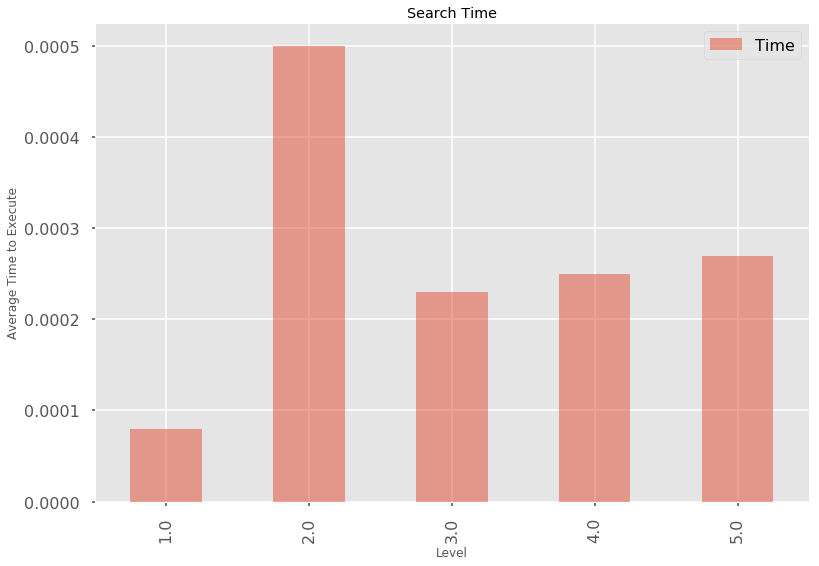

In [11]:
results.plot.bar(x='Level', y='Time', align='center', alpha=0.5)
plt.ylabel('Average Time to Execute')
plt.title('Search Time')

plt.show()